## Practice 3

### Крок 1: Генерація даних
(Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.

Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.

Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.

Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка, де похибка - це випадковий шум.)

In [100]:
import pandas as pd
import numpy as np

# Генерація даних
np.random.seed(0)
amount = 1000          # к-сть рядків

area = np.random.randint(50, 200, size=amount)
rooms = np.random.randint(1, 5, size=amount)
distance = np.random.randint(1, 20, size=amount)
prices = [10 * a + 5 * b - 2 * d + np.random.randint(0, 40) for a, b, d in zip(area, rooms, distance)]


# Створимо DataFrame зі згенерованими даними
data = {
    'Площа житла (м^2)': area,
    'К-сть спалень': rooms,
    'Відстань до центру (км)': distance,
    'Ціна житла (1000$)': prices
}

# Занесення даних в таблицю
df = pd.DataFrame(data)      

# Збережемо DataFrame у CSV файл
df.to_csv('дані_нерухомості.csv', index=False)

### Крок 2: Розділення даних

Розділіть ваші дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

In [101]:
# Завантаження даних
data = pd.read_csv('дані_нерухомості.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Площа житла (м^2)  К-сть спалень  Відстань до центру (км)  \
0                 97              4                        2   
1                167              1                       13   
2                117              1                       10   
3                153              2                       12   
4                 59              1                        4   

   Ціна житла (1000$)  
0                1004  
1                1684  
2                1176  
3                1544  
4                 620   

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Площа житла (м^2)        1000 non-null   int64
 1   К-сть спалень            1000 non-null   int64
 2   Відстань до центру (км)  1000 non-null

In [102]:
# # Завантаження даних
# data = pd.read_csv('дані_нерухомості.csv')

# Вибір функцій (ознак) для аналізу та цільової змінної
X = data[['Площа житла (м^2)', 'К-сть спалень', 'Відстань до центру (км)']]
y = data['Ціна житла (1000$)']

# Розділення даних на тренувальний і тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Крок 3: Побудова моделі регресії

Використовуйте бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.

Навчіть модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

In [103]:
# Лінійна регресія
from sklearn.linear_model import LinearRegression

# Побудова та навчання моделі лінійної регресії
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Прогноз на тестовому наборі
y_pred = linear_reg_model.predict(X_test)

### Крок 4: Оцінка моделі
Використайте модель для зроблення прогнозів на тестовому наборі. (вже зробила вище)

Оцініть якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

In [104]:
# Оцінка моделі за доп. метрик: середньо-квадратична помилка(Mean Squared Error), 
# коефіцієнт детермінації(R-squared)
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

print("Для Лінійної рогресії: \n")
# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

r2 = r2_score(y_test, y_pred)                                          # Обчислення R-squared
print(f'R-squared: {r2:.2f}')  

Для Лінійної рогресії: 

MSE: 145.47
R-squared: 1.00


### Крок 5: Візуалізація результатів

Побудуйте графік, на якому відобразіть реальні ціни житла та прогнозовані моделлю ціни для тестового набору.

Додайте лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

Text(0.5, 1.0, 'Лінійна регресія')

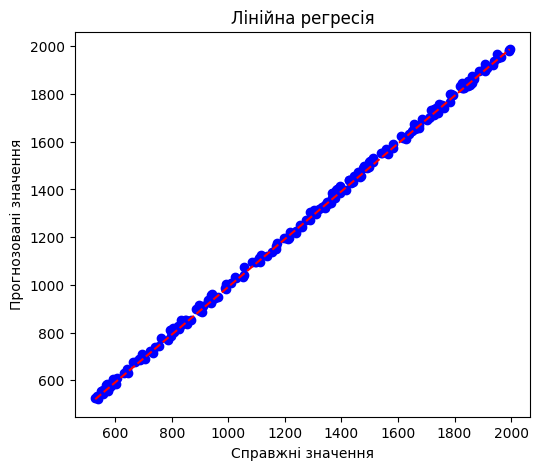

In [105]:
import matplotlib.pyplot as plt

# Візуалізація результатів для лінійної регресії
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Лінійна регресія")

### Крок 6: Висновки

Напишіть короткий звіт, де ви розповідаєте про якість моделі та її здатність прогнозувати ціну житла на основі введених ознак.

На етапі 4 - оцінка моделі ми вирахували середньо-квадратичну помилку(Mean Squared Error), 
та коефіцієнт детермінації(R-squared). Як бачимо, по виводу, MSE дуже мале, а R-squared = 1.

Також, по графіку, видно, що всі значення лежать приблизно на головній осі.

Тому, можна сказати, що модель якісна, і здатна достатньо точно прогнозувати ціну житла на основі введених ознак

Але, при збільшенні значень шуму (ще на етапі генерації даних), отчінсь моделі знизується.